## Do H' and lambda pods
__NB:__ `conda install -c r rpy2=2.8.6 -f`
rpy2 needs to be a specific version to work in the ipython notebook.

In [ ]:
%matplotlib inline
%load_ext rpy2.ipython

import os

GIMME_DIR = "/home/isaac/gimmeSAD/"
os.chdir(GIMME_DIR)
SIMOUT_DIR = os.path.join(GIMME_DIR, "ad_sims/")


import gimmeSAD
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import glob

## Gather all the simulations into one huge simout file

In [38]:
REF_TABLE = os.path.join(SIMOUT_DIR, "priors.txt")
if True:
#if not os.path.exists(REF_TABLE):
    outfile = open(REF_TABLE, "w")

    files = glob.glob(SIMOUT_DIR + "*/sumstats.txt")
    numsims = 0
    outfile.write(open(files[0]).readlines()[0])
    for f in files:
        lines = open(f).readlines()[1:]
        ## Drop all the extra sims at equilibrium
        new_lines = []
        for line in lines:
            if line.split()[3] == "1":
                pass
            else:
                new_lines.append(line)
        lines = new_lines
        numsims += len(lines)
        outfile.write("".join(lines))
#        outfile.write("\n")
    outfile.close()

    print("Processed {} simulations.".format(numsims))

Processed 83034 simulations.


## Do the abc in R cuz python abc packages suck
https://www.datacamp.com/community/blog/jupyter-notebook-r#gs.CkjgxoE

## Load the data into R

In [39]:
%%R -i REF_TABLE
## Have to install the abc package the first time
##install.packages("abc")
library(abc)

## fill adds NA for any incomplete row
PRIOR <- read.table(REF_TABLE, header=TRUE, fill=TRUE)
print(PRIOR[1,])


     K          c  step   X.equil colrate extrate  shannon bin_0 bin_1 bin_2
1 1221 0.01770633 10000 0.1474201  0.0189  0.0103 2.082687    23    15     0
  bin_3 bin_4 bin_5 bin_6 bin_7 bin_8 bin_9
1     1     2     0     0     0     0     1


# Scenario M(A) - H'

## Λ PODS

Prediction error based on a cross-validation sample of 50

              eq
0.001 0.04524659
0.005 0.04581155
0.01  0.04626379
0.05  0.04649903
0.1   0.04788377


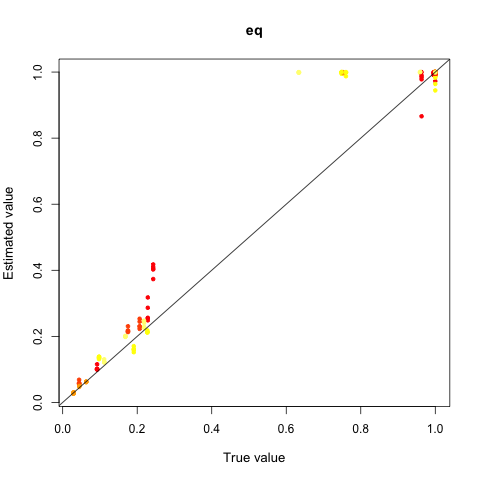

In [12]:
%%R
cv.res.reg <- cv4abc(data.frame(eq=PRIOR[,"X.equil"]), PRIOR[,7], nval=50, tols=c(.001, .005, .01, .05), method="loclinear")
print(summary(cv.res.reg))
plot(cv.res.reg)

Prediction error based on a cross-validation sample of 20

            eq
0.01 0.1736363
0.05 0.1911525
0.5  0.2322665


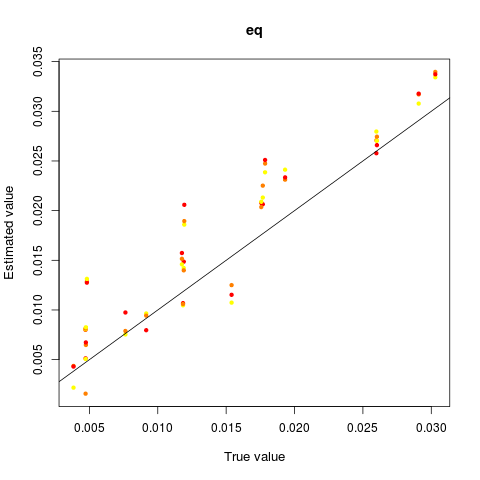

In [21]:
%%R
cv.res.reg <- cv4abc(data.frame(eq=PRIOR[,"colrate"]), PRIOR[,7], nval=20, tols=c(.01, .05, 0.5), method="loclinear")
print(summary(cv.res.reg))
plot(cv.res.reg)

# Scenario M(I) - 1D SGD
## Estimate H' using 1D π vector

Prediction error based on a cross-validation sample of 50

          shan
0.01 0.1545199
0.05 0.1511529


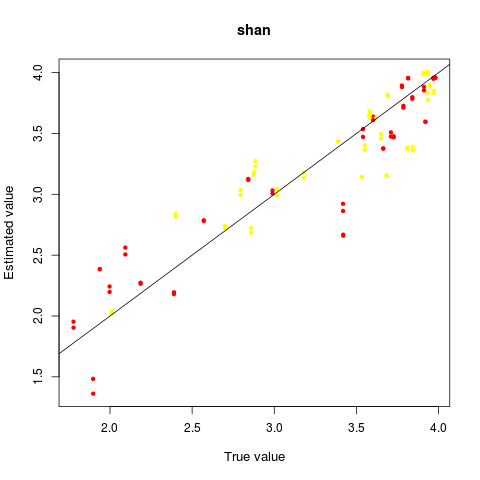

In [42]:
%%R
cv.res.reg <- cv4abc(data.frame(shan=PRIOR[,"shannon"]), PRIOR[,8:17],
                     nval=50, tols=c(.01, .05), method="loclinear", 
                     statistic="median")
print(summary(cv.res.reg))
plot(cv.res.reg)

## Estimate Λ using 1D π pi vector

Prediction error based on a cross-validation sample of 50

            eq
0.01 0.5214891
0.05 0.5213534


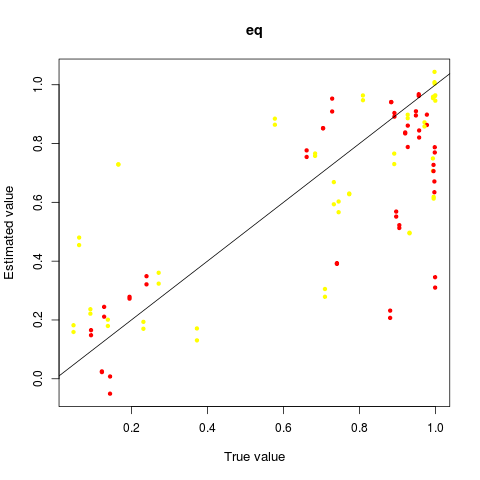

In [44]:
%%R
cv.res.reg <- cv4abc(data.frame(eq=PRIOR[,"X.equil"]), PRIOR[,8:17], 
                     nval=50, tols=c(.01, .05), method="loclinear", 
                     statistic="median")
print(summary(cv.res.reg))
plot(cv.res.reg)

# Scenario M(AI) - 1D SGD & H'
## Estimate Λ using 1D π vector and Shannon's Index

Prediction error based on a cross-validation sample of 50

            eq
0.01 0.1050862
0.05 0.1169718
0.5  0.1471389


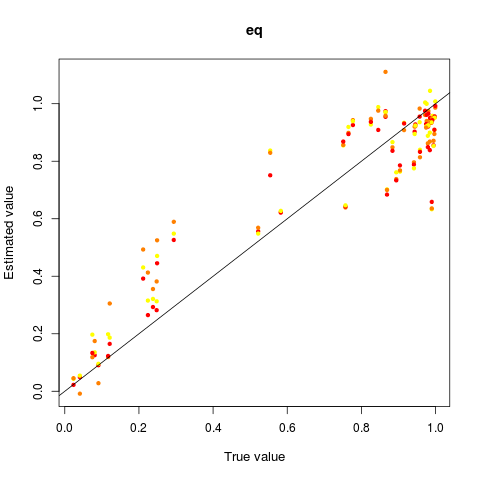

In [45]:
%%R
cv.res.reg <- cv4abc(data.frame(eq=PRIOR[,"X.equil"]), PRIOR[,7:17], 
                     nval=50, tols=c(.01, .05, 0.5), method="loclinear")
print(summary(cv.res.reg))
plot(cv.res.reg)

## Estimate colonization rate using shannon index and 1d pi vector

Prediction error based on a cross-validation sample of 20

            eq
0.01 0.1736363
0.05 0.1911525
0.5  0.2322665


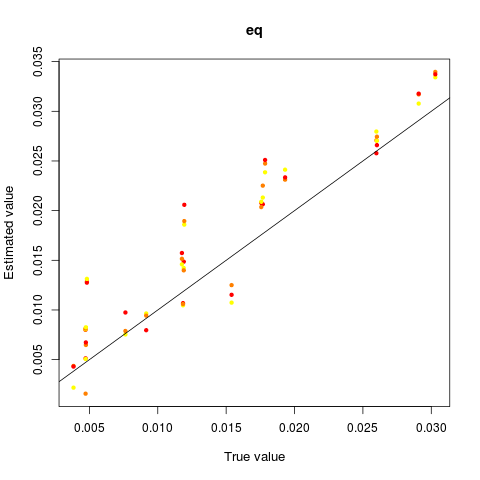

In [21]:
%%R
cv.res.reg <- cv4abc(data.frame(eq=PRIOR[,"colrate"]), PRIOR[,7:17], nval=20, tols=c(.01, .05, 0.5), method="loclinear")
print(summary(cv.res.reg))
plot(cv.res.reg)

## Estimate island size using shannon and 1d pi vector

Prediction error based on a cross-validation sample of 50

             eq
0.001 0.6453266
0.005 0.3867152
0.01  0.3609488
0.05  0.3812574
0.1   0.3750593


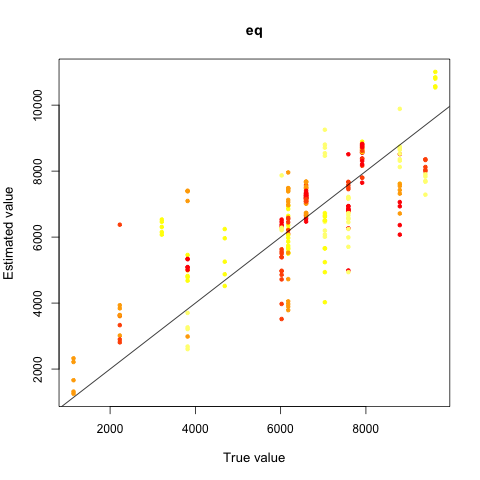

In [74]:
%%R
cv.res.reg <- cv4abc(data.frame(eq=PRIOR[,"K"]), PRIOR[,7:17], nval=50, tols=c(.001, .005, .01, .05,.1), method="loclinear")
print(summary(cv.res.reg))
plot(cv.res.reg)

# Co-estimate island size and %equil 

## Estimate island size/%equil using shannon and 1d pi vector

In [ ]:
%%R
cv.res.reg <- cv4abc(data.frame(k=PRIOR[,"K"], eq=PRIOR[,"X.equil"]), PRIOR[,7:17], nval=50, tols=c(.001, .005, .01, .05,.1), method="loclinear")
print(summary(cv.res.reg))
plot(cv.res.reg)

# Scenario M(MI) - 2D SGD

# Scenario M(AMI) - 2D SGD & H'

# Trash below here

### Neuralnet (slow)

12345678910
12345678910
12345678910
12345678910
12345678910
12345678910
12345678910
12345678910
12345678910
12345678910
12345678910
12345678910
12345678910
12345678910
12345678910
12345678910
12345678910
12345678910
12345678910
12345678910
12345678910
12345678910
12345678910
12345678910
12345678910
12345678910
12345678910
12345678910
12345678910
12345678910
12345678910
12345678910
12345678910
12345678910
12345678910
12345678910
12345678910
12345678910
12345678910
12345678910
12345678910
12345678910
12345678910
12345678910
12345678910
12345678910
12345678910
12345678910
12345678910
12345678910
12345678910
12345678910
12345678910
12345678910
12345678910
12345678910
12345678910
12345678910
12345678910
12345678910
12345678910
12345678910
12345678910
12345678910
12345678910
12345678910
12345678910
12345678910
12345678910
12345678910
12345678910
12345678910
12345678910
12345678910
12345678910
12345678910
12345678910
12345678910
12345678910
12345678910
Prediction error based on a cross-valida

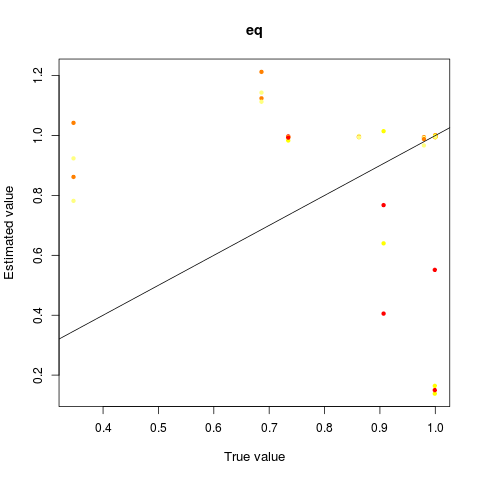

In [23]:
%%R
## This is slow even on toy data
cv.res.net <- cv4abc(data.frame(eq=PRIOR[,"X.equil"]), PRIOR[,7:17], nval=10, tols=c(.01, .05,.1, 0.5), method="neuralnet")
print(summary(cv.res.net))
plot(cv.res.net)

In [27]:
dat = open("new_sims/priors.txt").readlines()
outfile = open("new_sims/newpriors.txt", 'w')
outfile.write(dat[0])
count = 0
for line in dat[1:]:
    try:
        if len(line) ==1:
                count += 1
        elif not line.strip().split()[3] == "1":
                outfile.write(line)
    except:
        pass
print("how many blanks {}".format(count))

how many blanks 508


In [62]:
import math
def shannon(abundances):
    ## Unpack the abundance dist
    abunds = [v for v in abundances.values()]
    tot = np.sum(abunds)
    return -1 * np.sum([x/float(tot) * math.log(x/float(tot)) for x in abunds  if x > 0])

In [78]:
#8   25  7   4   1   3   2   4   1   2
wat = {1:8, 2:25, 3:7, 5:4, 6:1, 7:3, 8:2, 9:4, 10:1, 11:2}
shannon(wat)

[8, 25, 7, 4, 1, 3, 2, 4, 1, 2]
57


1.7994095226462321

In [30]:
%%R
summary(cv.res.net)
cv.res.net + cv.res.net

Prediction error based on a cross-validation sample of 10
Error in cv.res.net + cv.res.net : 
  non-numeric argument to binary operator


/home/isaac/miniconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Error in cv.res.net + cv.res.net : 
  non-numeric argument to binary operator

  warnings.warn(x, RRuntimeWarning)
